# Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

## History

Logistic regression was developed by statistician David Cox in 1958. The binary logistic regression model has been extended to include multiple independent variables and more than two categories of the dependent variable (multinomial logistic regression).

## Mathematical Equations

The logistic regression model uses the logistic function to model the probability of the positive class given the input features. The logistic function is defined as follows:

`sigmoid(z) = 1 / (1 + exp(-z))`

The logistic regression equation is given by:

`P(Y=1 | X) = sigmoid(w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n)`

where:

- `P(Y=1 | X)` is the probability of the positive class given the input features
- `x_i` are the input features
- `w_i` are the weights (coefficients) of the input features

## Learning Algorithm

The learning algorithm for logistic regression aims to find the optimal weights that maximize the likelihood of the observed data. The most common method for doing this is Maximum Likelihood Estimation (MLE), which can be solved using gradient descent or other optimization algorithms.

1. Initialize the weights and bias to zero or small random values.
2. Calculate the gradient of the log-likelihood with respect to the weights and bias.
3. Update the weights and bias using the calculated gradient and a learning rate.
4. Repeat steps 2 and 3 for a specified number of iterations or until convergence.

## Pros and Cons

**Pros:**

- Simple and easy to implement.
- Efficient and scalable for large datasets.
- Can be easily extended to multiclass classification using techniques like one-vs-rest or one-vs-one.
- Provides probabilities for outcomes, which can be useful for ranking or thresholding.

**Cons:**

- Assumes a linear relationship between the log-odds of the dependent variable and the independent variables.
- May not perform well on non-linear or complex data.
- Can be sensitive to multicollinearity and the choice of learning rate.

## Suitable Tasks and Datasets

Logistic regression is suitable for binary classification tasks where the relationship between the independent and dependent variables can be modeled using the logistic function. Some examples include:

- Predicting whether a customer will make a purchase or not.
- Classifying emails as spam or not spam.
- Diagnosing diseases based on medical test results.

## References

1. Cox, D. R. (1958). The regression analysis of binary sequences. Journal of the Royal Statistical Society: Series B (Methodological), 20(2), 215-242.
2. Hosmer Jr, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied logistic regression. John Wiley & Sons.
3. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return [1 if p >= 0.5 else 0 for p in y_pred]



Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]


ValueError: shapes (438592,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

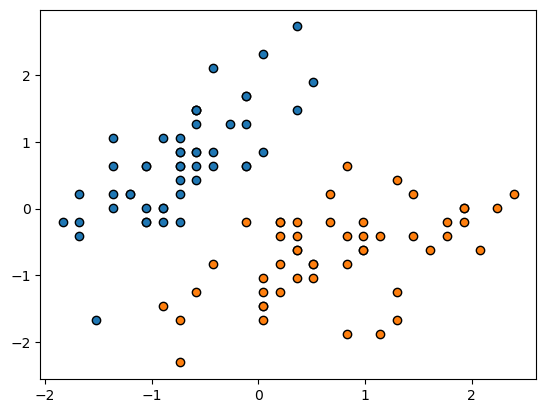

In [2]:
# Load the Iris dataset and select only the first two classes
iris = load_iris()
X, y = iris.data[:100], iris.target[:100]

# Normalize the data for better convergence
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model with gradient descent
model = LogisticRegressionGD(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_mat)

# Visualize the decision boundary
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                label=iris.target_names[idx], edgecolors='k')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.title('Logistic Regression Decision Boundary')
plt.show()

